In [48]:
#importing neccesary libraries
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For scaling features
from sklearn.preprocessing import StandardScaler

# For machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# For evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

# To suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")


**Reading the dataset into pandas DataFrame**

In [49]:
og_data = pd.read_csv('/content/Jamboree.csv')

In [50]:
df = og_data.copy()

# **Exploring the Data**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Statistical description of the dataset**

In [52]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [53]:
#checking null values
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There seems to be no null values present

In [54]:
#Dropping the irrelevant 'Serial NO.' column
df = df.drop(columns=['Serial No.'])

In [55]:
#Exploring shape of data
df.shape

(500, 8)

In [56]:
#checking the Data types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**The memory usage here is 31.4KB which can be reduced significantly .**

In [57]:
# Step 1: Check the min and max values of each column
print("\nRange of each attribute:")
for column in df.columns:
    print(f"{column}: Min = {df[column].min()}, Max = {df[column].max()}")



Range of each attribute:
GRE Score: Min = 290, Max = 340
TOEFL Score: Min = 92, Max = 120
University Rating: Min = 1, Max = 5
SOP: Min = 1.0, Max = 5.0
LOR : Min = 1.0, Max = 5.0
CGPA: Min = 6.8, Max = 9.92
Research: Min = 0, Max = 1
Chance of Admit : Min = 0.34, Max = 0.97


In [58]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now proceed with the dtype conversions
df['GRE Score'] = df['GRE Score'].astype('int16')
df['TOEFL Score'] = df['TOEFL Score'].astype('int8')
df['University Rating'] = df['University Rating'].astype('int8')
df['SOP'] = df['SOP'].astype('float32')
df['LOR'] = df['LOR'].astype('float32')
df['CGPA'] = df['CGPA'].astype('float32')
df['Research'] = df['Research'].astype('int8')
df['Chance of Admit'] = df['Chance of Admit'].astype('float32')

# Check the new memory usage
print("\nMemory usage after optimization:")
print(df.info())



Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int16  
 1   TOEFL Score        500 non-null    int8   
 2   University Rating  500 non-null    int8   
 3   SOP                500 non-null    float32
 4   LOR                500 non-null    float32
 5   CGPA               500 non-null    float32
 6   Research           500 non-null    int8   
 7   Chance of Admit    500 non-null    float32
dtypes: float32(4), int16(1), int8(3)
memory usage: 10.4 KB
None


**Now the memory usage here is 10.4KB which reduces execution time and improves efficiency.**

In [59]:
#Exploring the basic stats of data
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**GRE Score:**

25th Percentile (Q1): 308
50th Percentile (Median, Q2): 317
75th Percentile (Q3): 325
Insights: The middle 50% of the GRE scores lie between 308 and 325, indicating a concentration of scores in this range. There is a spread of scores above and below this range.

**TOEFL Score:**

25th Percentile (Q1): 103
50th Percentile (Median, Q2): 107
75th Percentile (Q3): 112
Insights: The majority of TOEFL scores fall between 103 and 112, showing that most applicants have relatively high English proficiency. The distribution is centered around the median.

**University Rating:**

25th Percentile (Q1): 2
50th Percentile (Median, Q2): 3
75th Percentile (Q3): 4
Insights: University ratings are skewed towards the higher end, with the middle 50% of ratings ranging from 2 to 4. This suggests a mix of ratings, with a tendency towards better-rated institutions.

**SOP (Statement of Purpose):**

25th Percentile (Q1): 2.5
50th Percentile (Median, Q2): 3.5
75th Percentile (Q3): 4
Insights: SOP ratings are fairly centered, with most applicants having SOPs rated between 2.5 and 4. This indicates a strong overall quality in SOPs, with most falling above average.

**LOR (Letter of Recommendation):**

25th Percentile (Q1): 3
50th Percentile (Median, Q2): 3.5
75th Percentile (Q3): 4
Insights: LOR ratings follow a similar pattern to SOP, with most applicants receiving LORs in the range of 3 to 4. This suggests a general trend of strong recommendations.

**CGPA:**

25th Percentile (Q1): 8.13
50th Percentile (Median, Q2): 8.56
75th Percentile (Q3): 9.04
Insights: The CGPA distribution is tight, with most values clustered between 8.13 and 9.04. This indicates that most applicants have high academic performance.

**Research:**

25th Percentile (Q1): 0
50th Percentile (Median, Q2): 1
75th Percentile (Q3): 1
Insights: The distribution is bimodal, with a significant number of applicants either having no research experience (0) or having it (1). This indicates a strong divide between those with and without research experience.

**Chance of Admit:**

25th Percentile (Q1): 0.63
50th Percentile (Median, Q2): 0.72
75th Percentile (Q3): 0.82
Insights: The chances of admission are generally high, with most applicants falling between 0.63 and 0.82. This shows a concentration of high admission probabilities.

# **Univariate Analysis**

# **Non graphical analysis**

In [60]:
mean=df.mean(axis=0)
median=df.median(axis=0)
mode=pd.DataFrame(df.mode(axis=0),columns=df.columns)
print(mean,'\n*********** mean:*************\n',median,'\n*********** mode:*************\n')
mode.head()
std=df.describe().loc['std']
Q1=df.describe().loc['25%']
Q3=df.describe().loc['75%']
IQR=Q3-Q1
max=Q1=df.describe().loc['max']
min=Q1=df.describe().loc['min']
print(std,'\n*********** IQR:*************\n',IQR,'\n*********** max:*************\n',max,'\n*********** min:*************\n',min)
skew=df.skew(axis=1)
kurt=pd.DataFrame(df.kurt(axis=1),columns=["kurt"])
kurt.head()
#print('\n*********** skew:*************\n',skew,'\n*********** kurt:*************\n',kurt)

GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64 
*********** mean:*************
 GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.56
Research               1.00
Chance of Admit        0.72
dtype: float64 
*********** mode:*************

GRE Score            11.295148
TOEFL Score           6.081868
University Rating     1.143512
SOP                   0.991004
LOR                   0.925450
CGPA                  0.604813
Research              0.496884
Chance of Admit       0.141140
Name: std, dtype: float64 
*********** IQR:*************
 GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR       

,kurt
0,5.342020
1,5.607376
2,5.608047
3,5.439713
4,5.605128


**1. Mean:**
The mean values show the average score or rating for each variable in the dataset. Notable observations:

GRE Score: 316.47, reflecting a strong average performance.
TOEFL Score: 107.19, indicating a high level of English proficiency.
CGPA: 8.58, reflecting high academic achievement among the applicants.
Chance of Admit: 0.72, suggesting that most students in the dataset have a fair chance of getting admitted.

**2. Median (50th Percentile):**
The median values provide insight into the central tendency of the dataset, showing that:

GRE: The 50th percentile score is 317, which is very close to the mean.
TOEFL: The median TOEFL score is 107, also aligning with the mean.
CGPA: Median of 8.56, showing that most applicants have high academic performance.
Research: The median is 1, indicating that the majority of students have research experience.

**3. Standard Deviation (std):**
Standard deviation gives an idea of how spread out the data is:

GRE and TOEFL Scores: Standard deviations of 11.30 and 6.08, respectively, show moderate variation in applicants' scores.
CGPA: A smaller standard deviation (0.60) reflects less variation in academic performance.
Chance of Admit: A standard deviation of 0.14 shows that there’s some variability, but most students have a moderate chance of admission.

**4. Interquartile Range (IQR):**
IQR gives the range between the 25th and 75th percentiles, providing insight into the spread of the middle 50% of the data:

GRE Score IQR: 17, showing a moderate variation in the central 50% of GRE scores.
TOEFL Score IQR: 9, reflecting a tight range for TOEFL scores.
CGPA IQR: 0.91, indicating less spread in the GPAs, meaning most students score similarly in their academics.

**5. Max/Min Values:**
GRE Score: Ranges from 290 to 340, indicating a diverse set of applicants.
TOEFL Score: Ranges from 92 to 120, again indicating a broad spectrum of English proficiency levels.
University Rating: Between 1 and 5, suggesting varying preferences for university selection.
CGPA: Ranges from 6.8 to 9.92, reflecting high academic qualifications.
Chance of Admit: Ranges from 0.34 to 0.97, showing a wide range of admission probabilities.

**5. Kurtosis:**
Kurtosis measures the "tailedness" of the distribution:

High Kurtosis: Indicates that the data have heavy tails or outliers. For instance, the GRE, TOEFL, and other variables show kurtosis values around 5.6, which is higher than a normal distribution's kurtosis of 3, suggesting the presence of extreme values in the dataset.
Summary:
The applicants have high GRE, TOEFL scores, and GPAs, with most of them having research experience.
The dataset exhibits moderate variation in some variables (e.g., GRE, TOEFL) and lower variability in others (e.g., CGPA).
The IQR and standard deviation confirm that applicants' data is relatively concentrated around high-performance metrics.
High kurtosis suggests the presence of outliers, possibly very high-scoring individuals.

# **Bivariate non graphical analysis**

In [61]:
df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [62]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# **Graphical analysis**

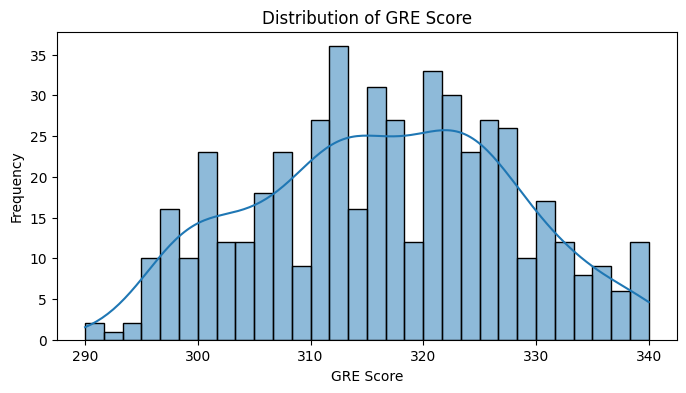

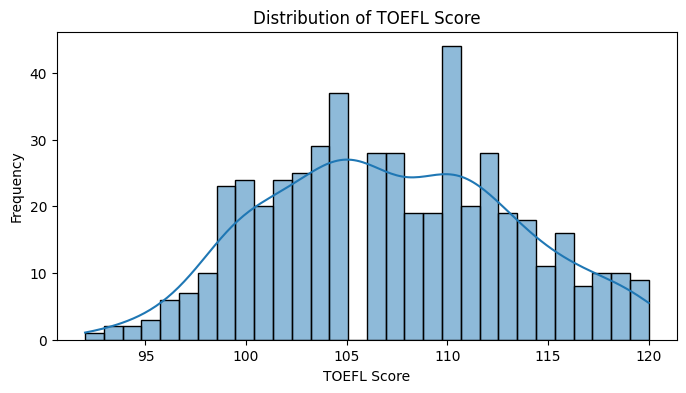

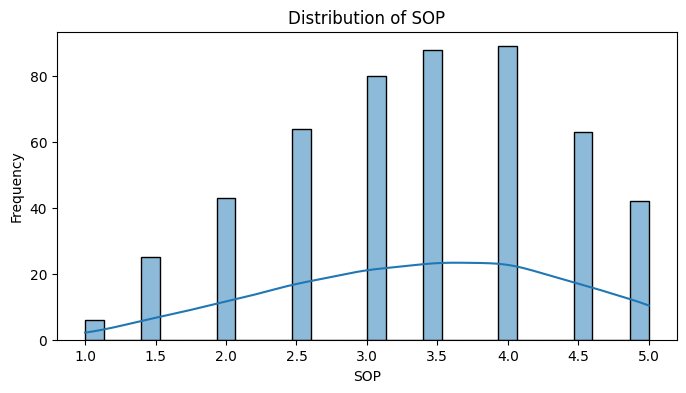

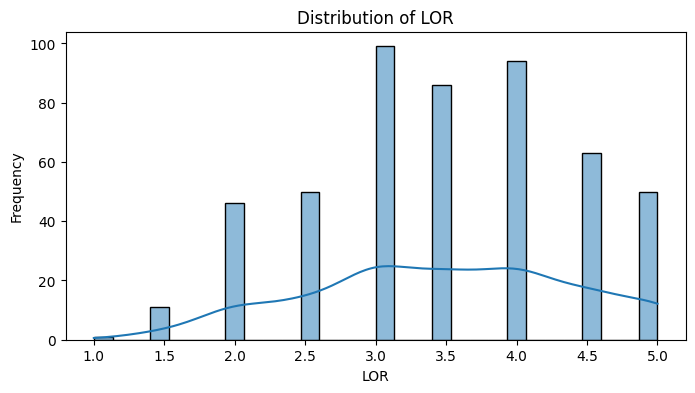

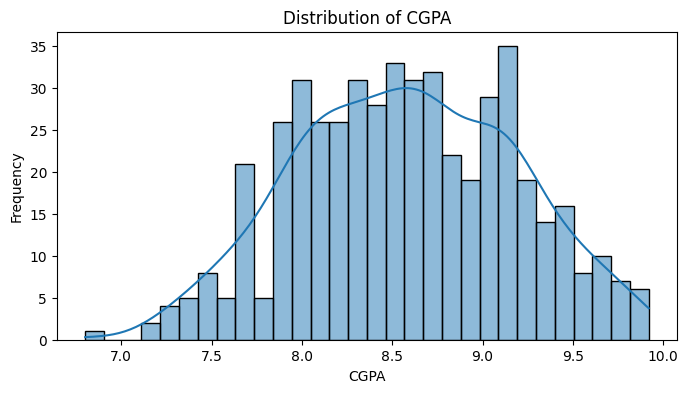

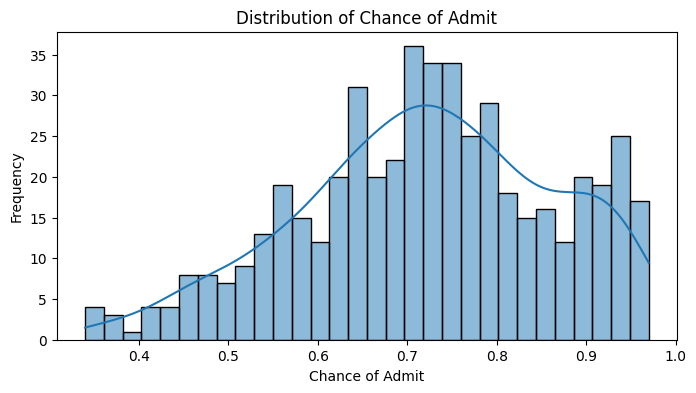

In [63]:
# Univariate Analysis - Distribution of Continuous Variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

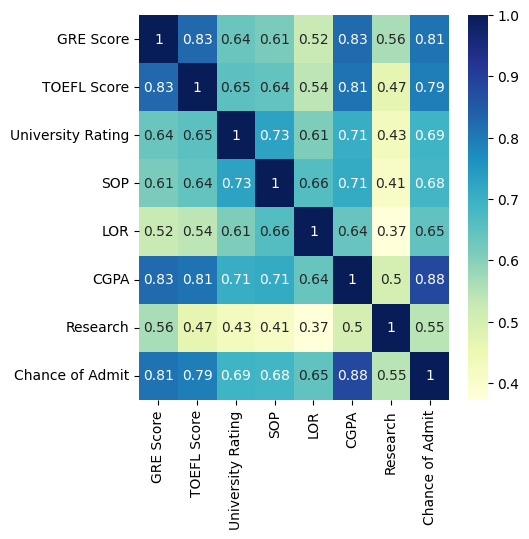

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<Figure size 1200x800 with 0 Axes>

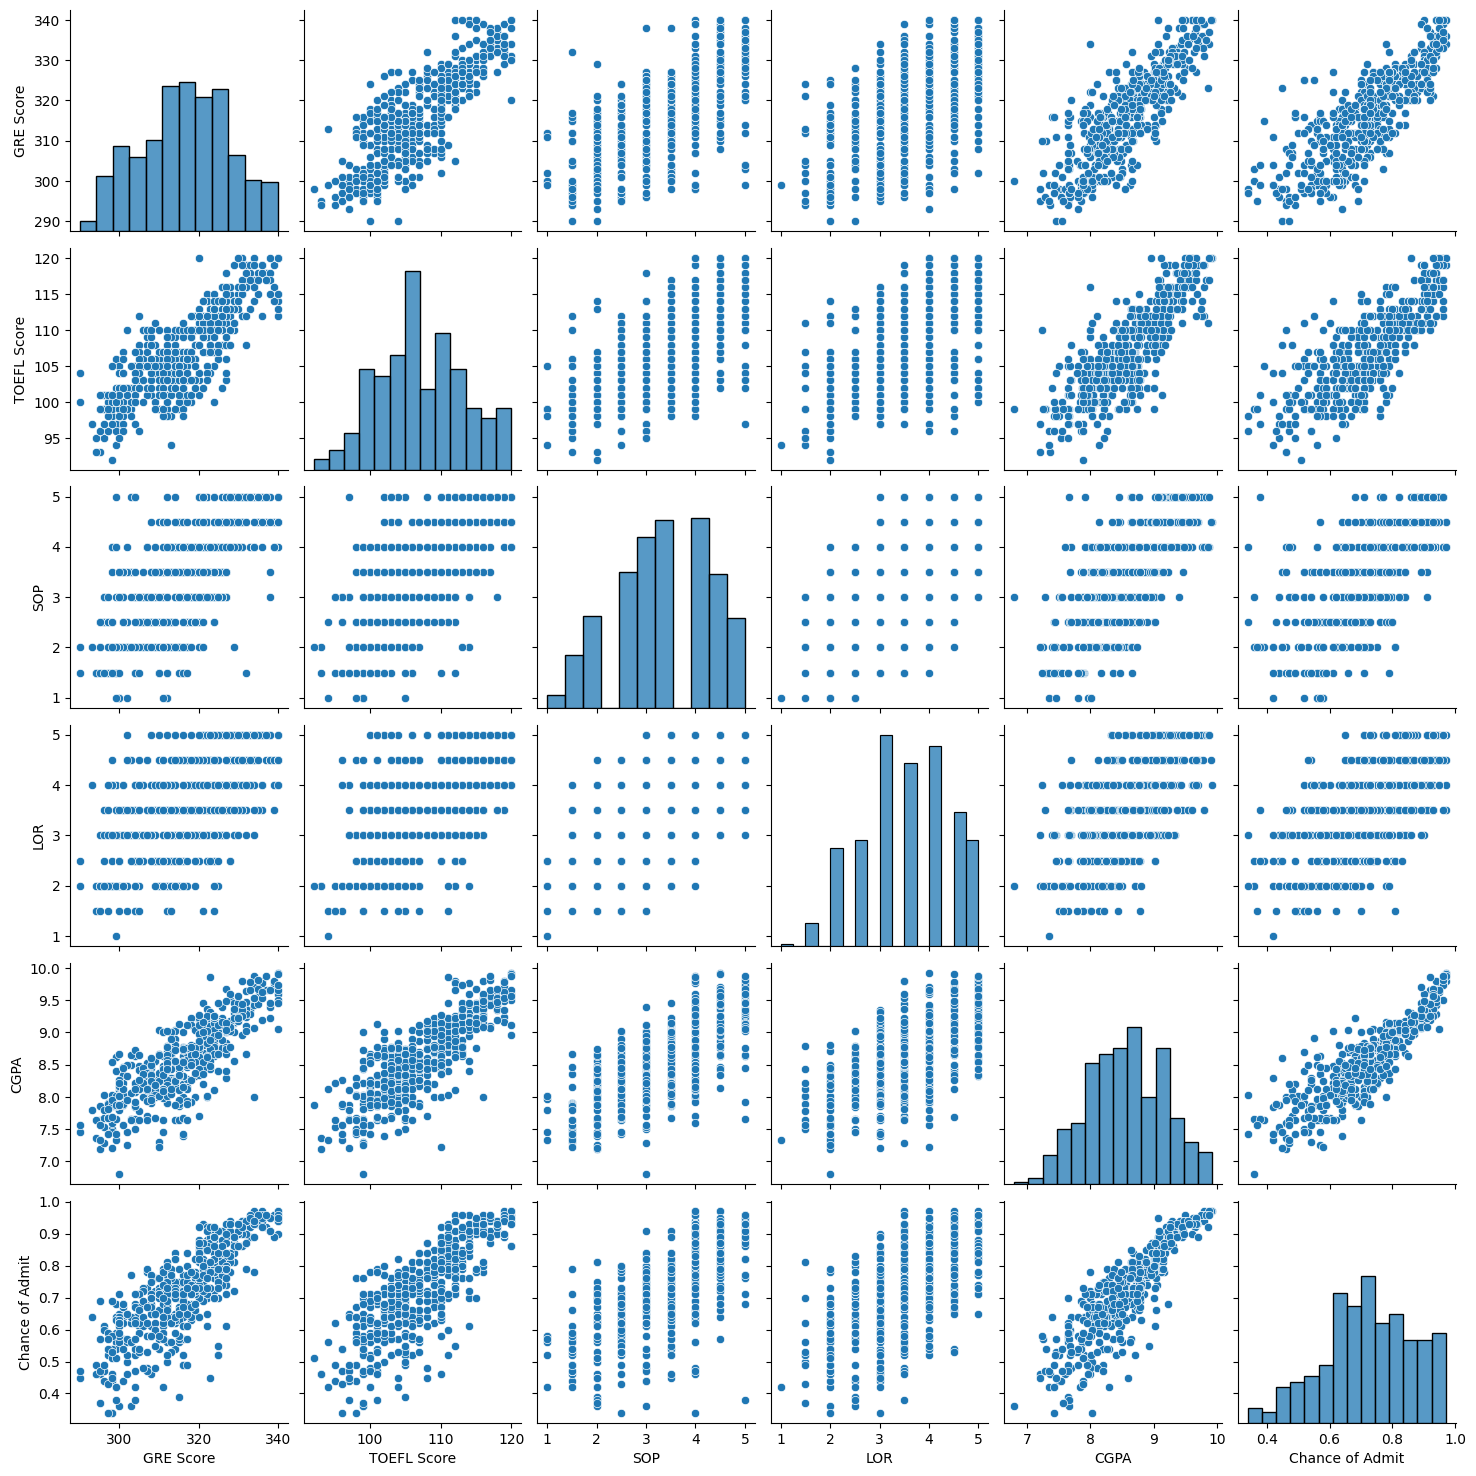

In [65]:
# Bivariate Analysis - Scatter Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df[continuous_vars])
plt.show()


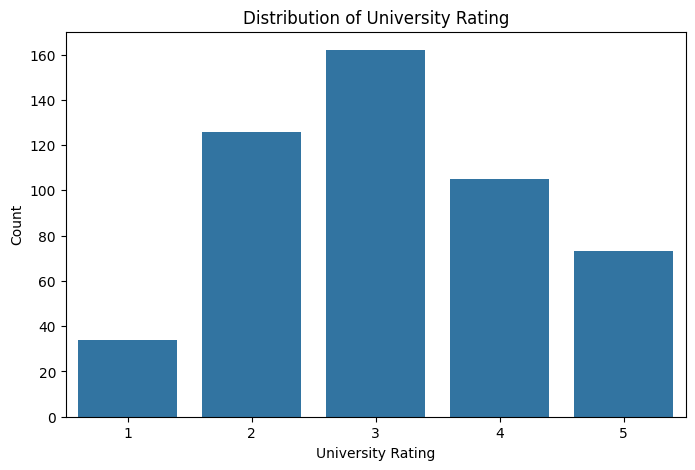

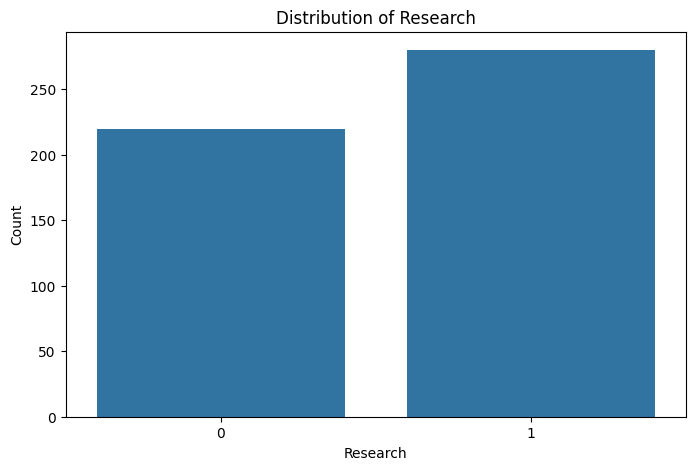

In [66]:
# Univariate Analysis - Distribution of Categorical Variables
categorical_vars = ['University Rating', 'Research']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[var])
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


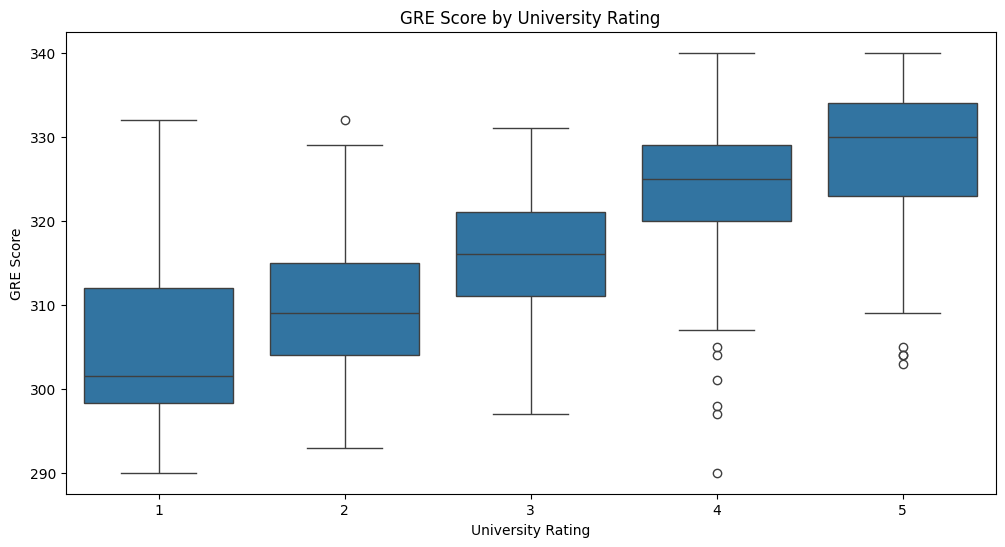

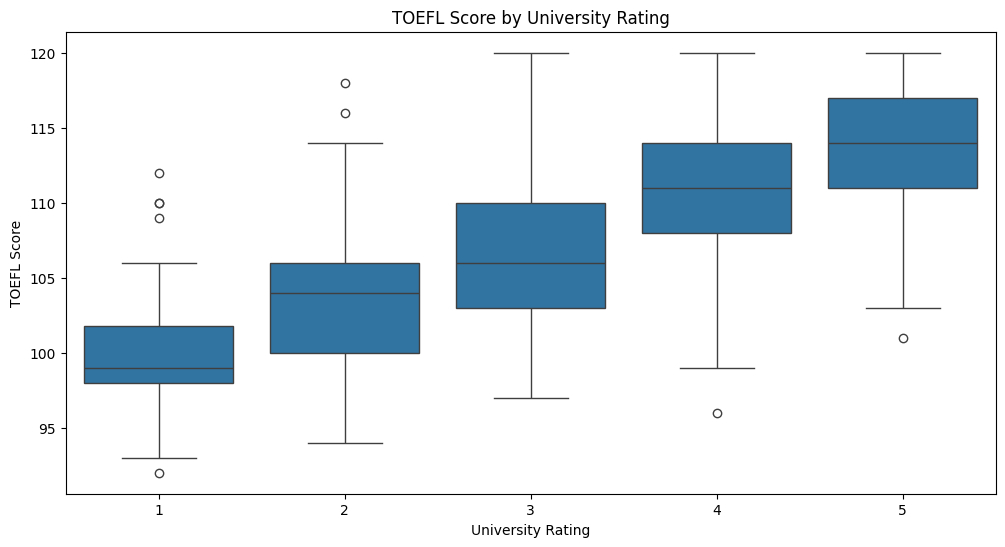

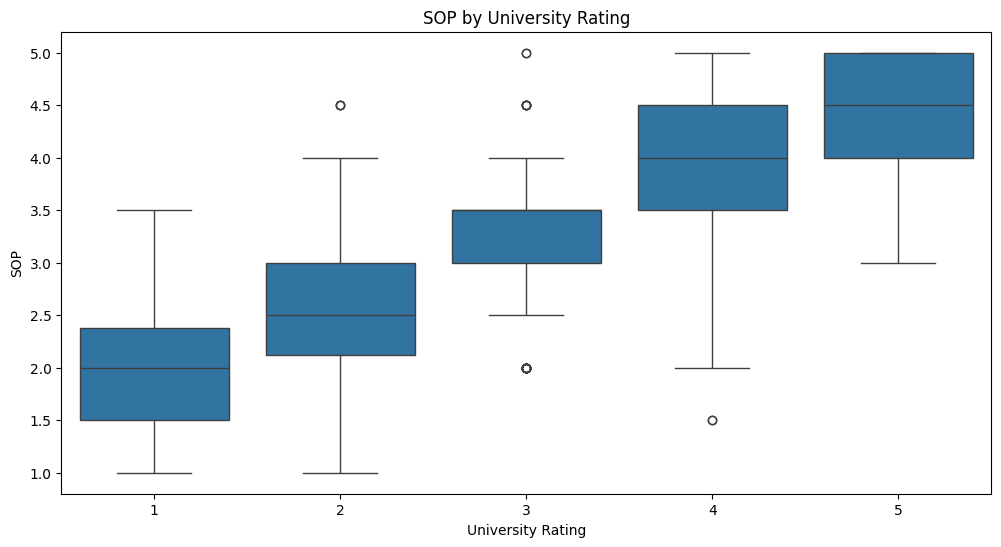

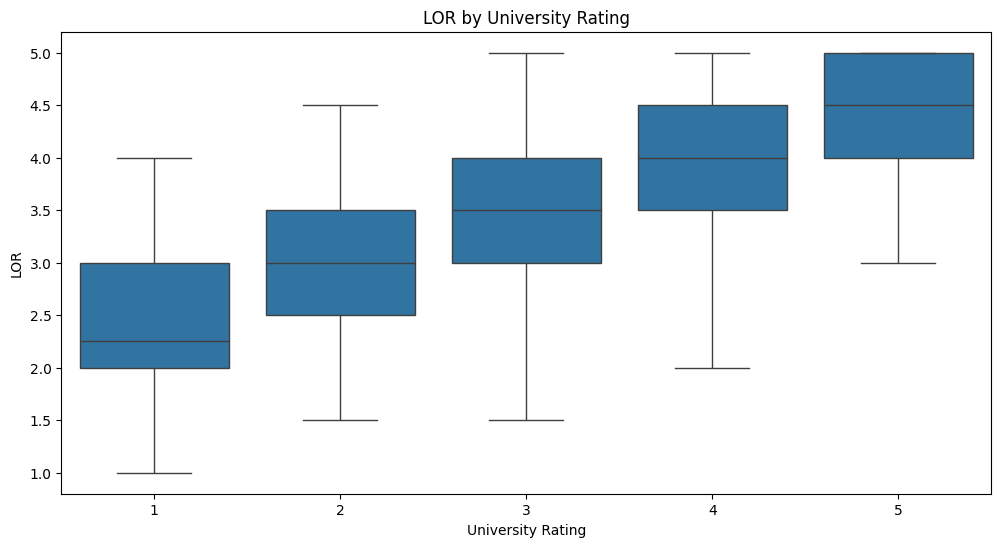

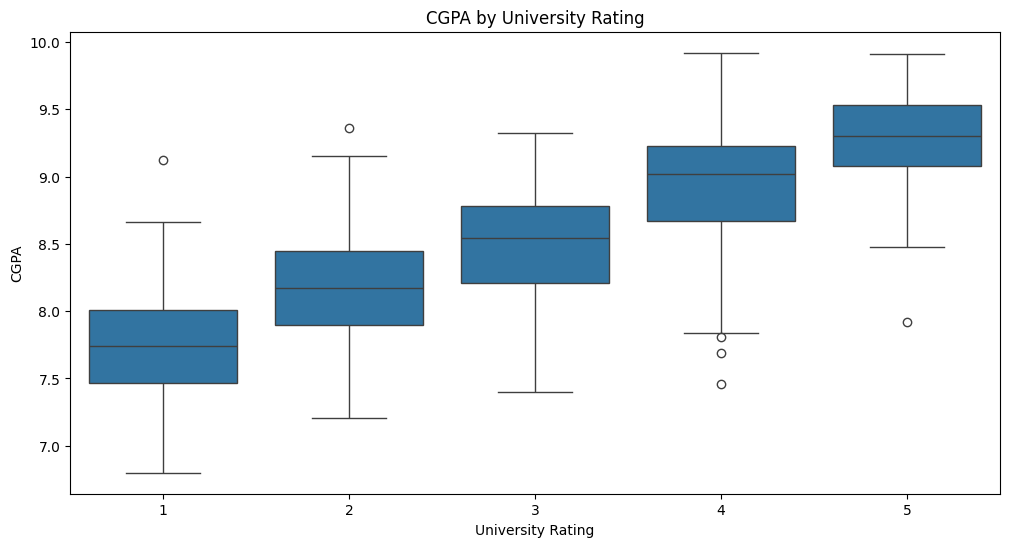

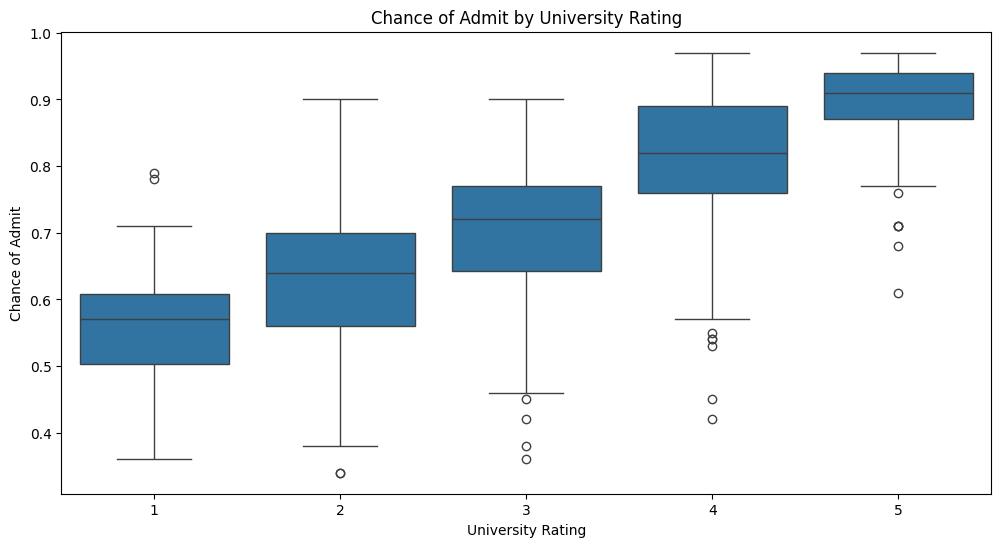

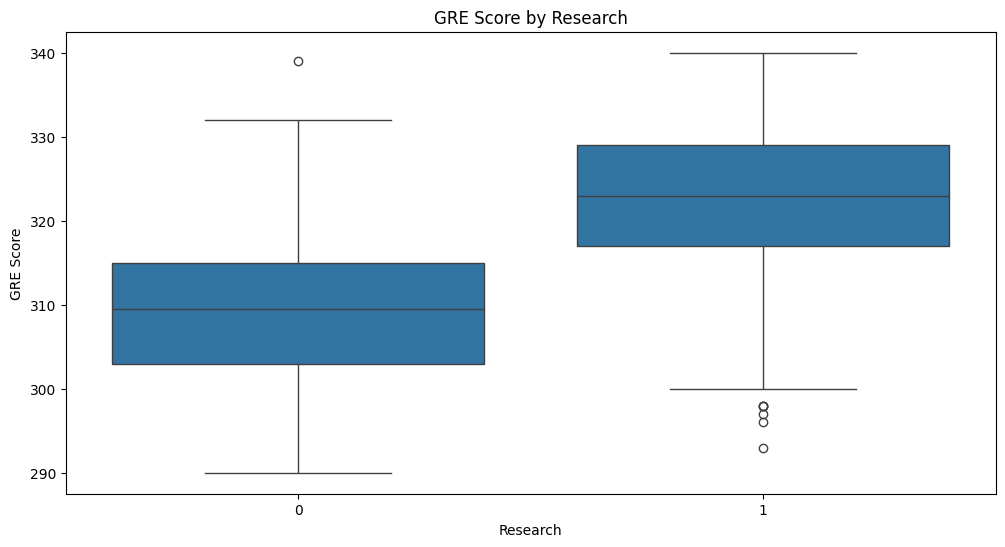

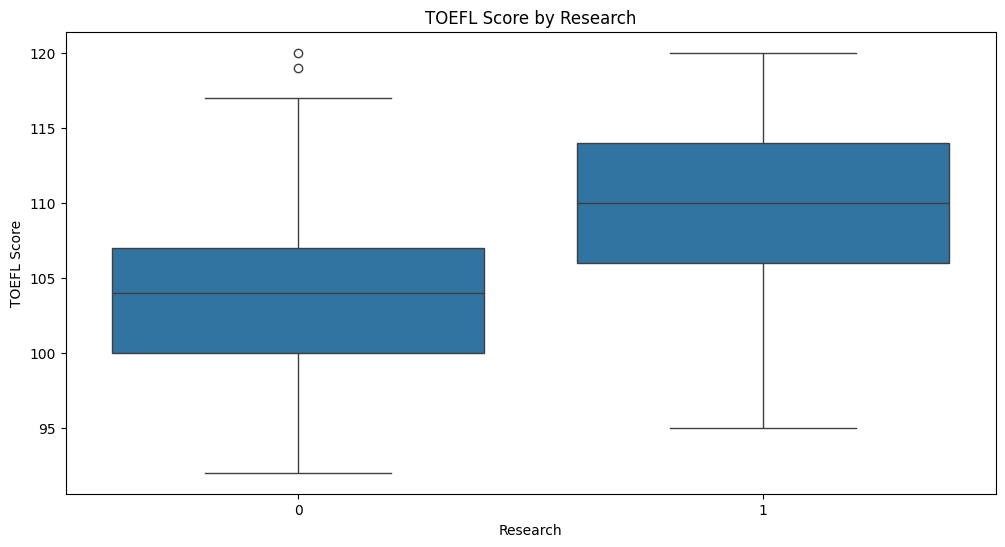

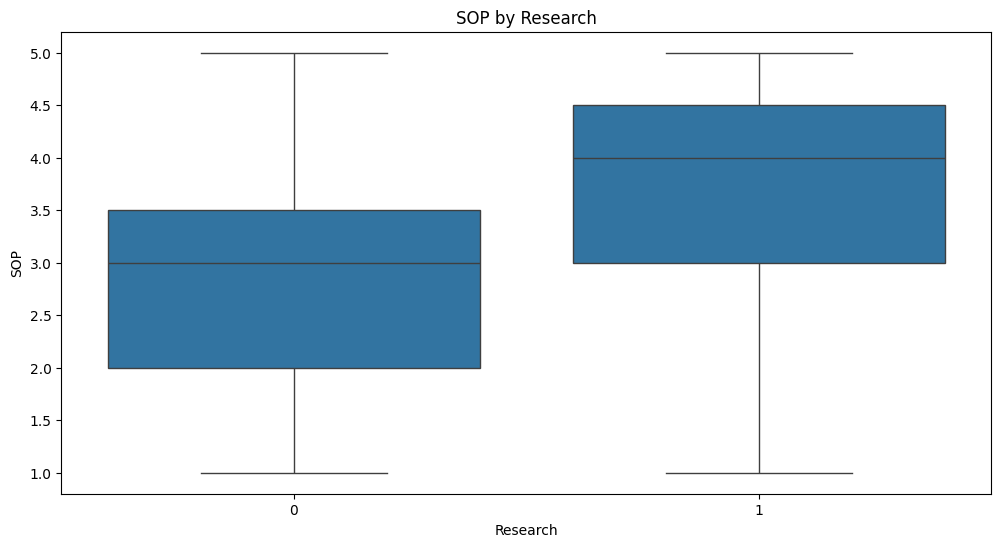

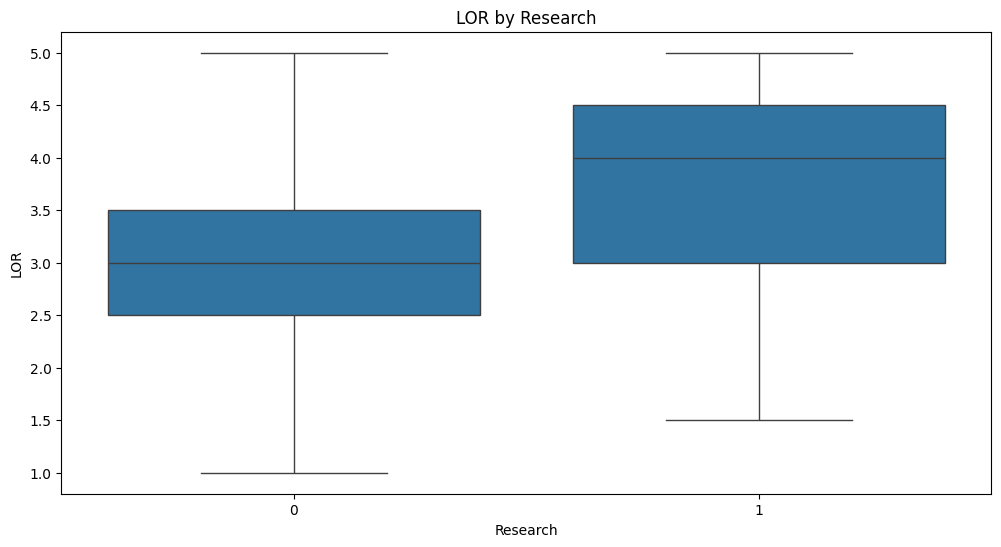

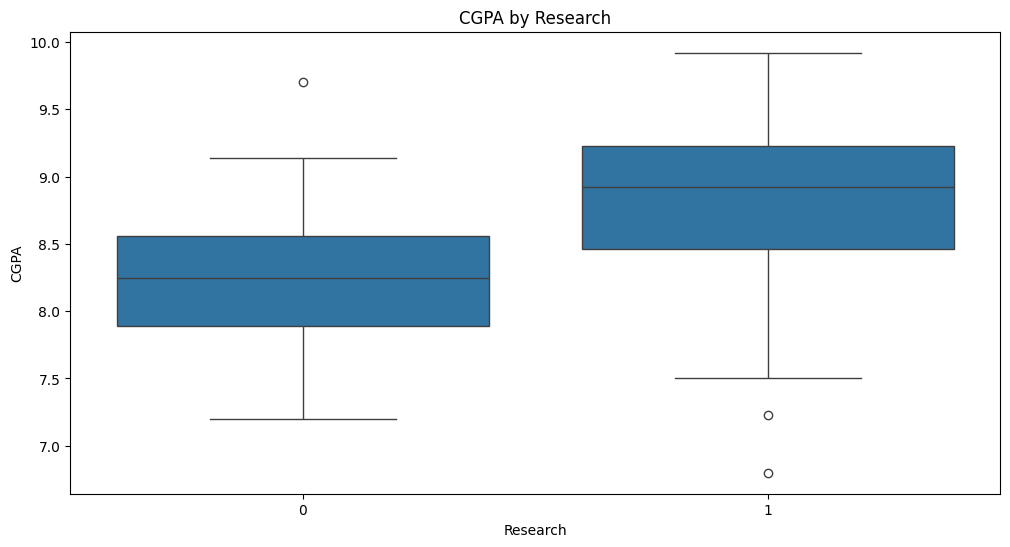

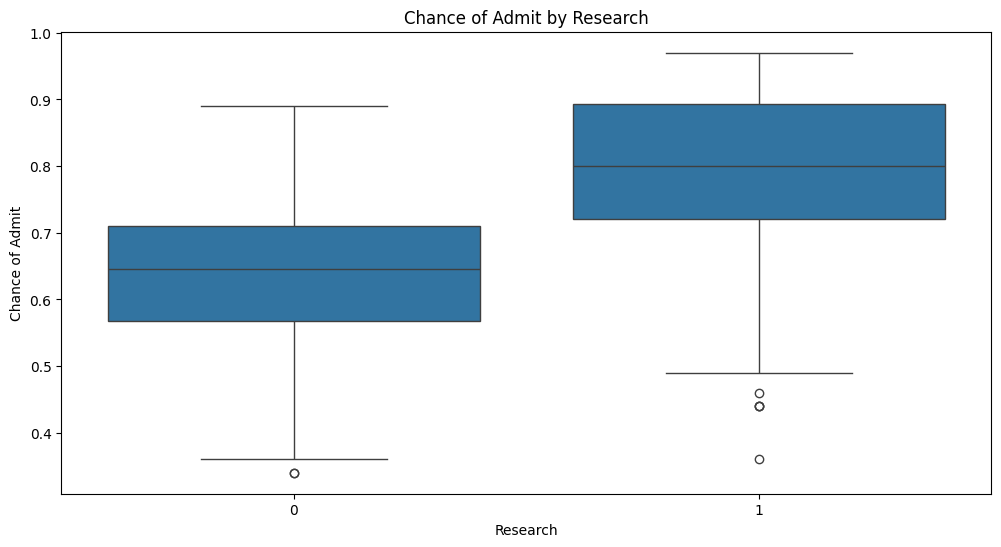

In [67]:
# Bivariate Analysis - Box Plot
for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[cat_var], y=df[cont_var])
        plt.title(f'{cont_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
        plt.show()


# **Duplicate check and Outlier treatment**

In [68]:
# Check for duplicates
duplicates = df.duplicated()

# Get the number of duplicates
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [69]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [70]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Outliers are values beyond 1.5 * IQR from Q1 and Q3
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Print the number of outliers in each column
print("Outliers in each column:\n", outliers.sum())

Outliers in each column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


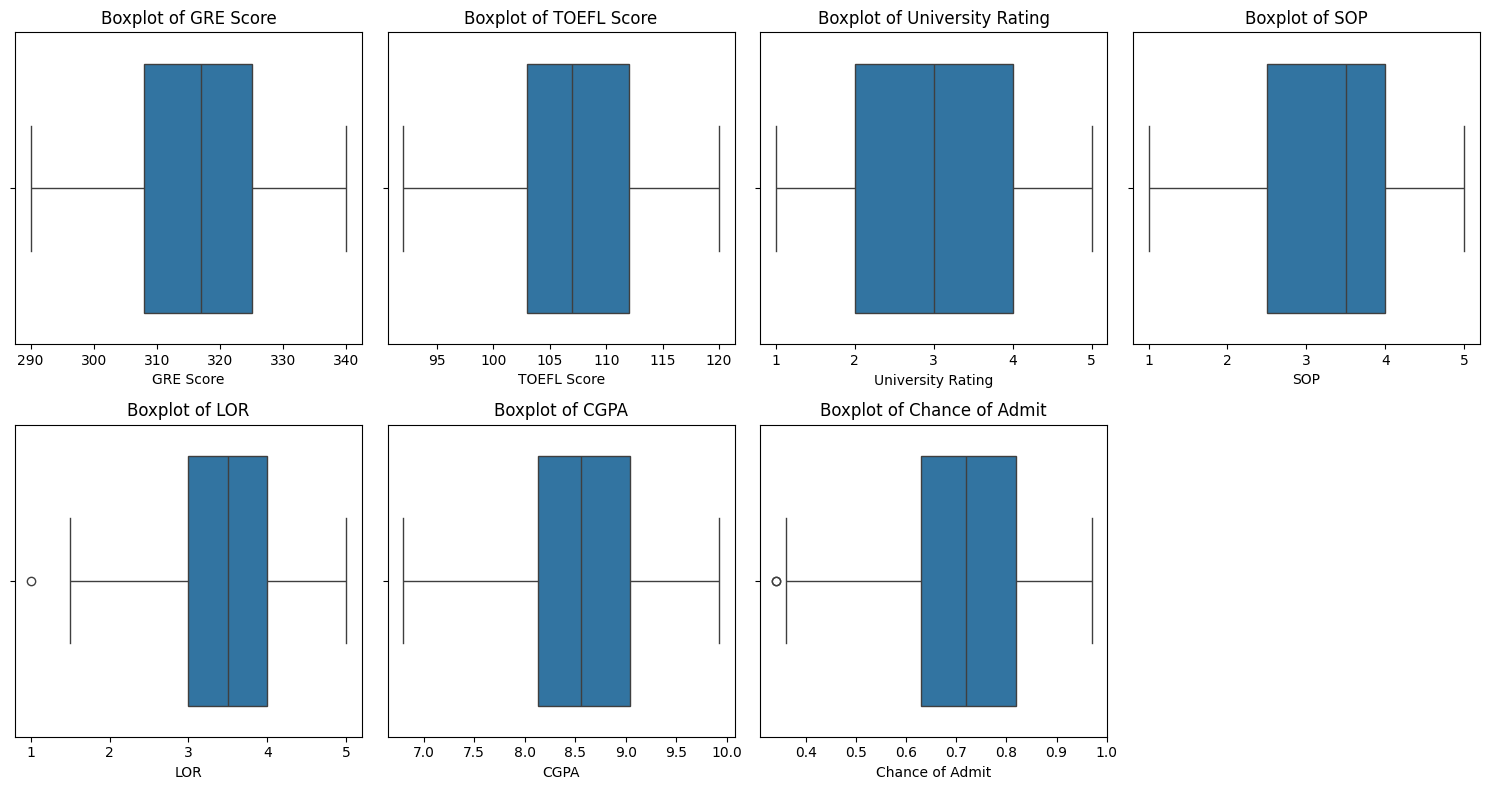

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a boxplot for continuous variables
variables = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
for i, var in enumerate(variables, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


**There are no duplicates and have  very few outliers and the data doesnt need clipping as even the high scores are legitimate and help broaden the data points**

In [72]:
new_df = df.copy()

In [73]:
new_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# **Feature Engineering**

Creating a new feature called 'academic_rating' where 1 symbolizes top 10 percent in both gre and toefl and reduces respectively till 3

In [74]:
import pandas as pd



# Calculate percentiles
percentile_90_gre = new_df['GRE Score'].quantile(0.90)
percentile_80_gre = new_df['GRE Score'].quantile(0.80)

percentile_90_toefl = new_df['TOEFL Score'].quantile(0.90)
percentile_80_toefl = new_df['TOEFL Score'].quantile(0.80)

percentile_90_cgpa = new_df['CGPA'].quantile(0.90)
percentile_80_cgpa = new_df['CGPA'].quantile(0.80)

# Create the academic_rating feature
def classify_academic(row):
    if (row['GRE Score'] > percentile_90_gre and
        row['TOEFL Score'] > percentile_90_toefl and
        row['CGPA'] > percentile_90_cgpa):
        return 1
    elif (row['GRE Score'] > percentile_80_gre and
          row['TOEFL Score'] > percentile_80_toefl and
          row['CGPA'] > percentile_80_cgpa):
        return 2
    else:
        return 3

new_df['academic_rating'] = new_df.apply(classify_academic, axis=1)

# Drop the original continuous features if no longer needed


# Check the new DataFrame
print(new_df.head())


   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance of Admit  academic_rating  
0             0.92                1  
1             0.76                3  
2             0.72                3  
3             0.80                3  
4             0.65                3  


In [75]:
new_df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,academic_rating
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,-0.544381
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,-0.585635
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,-0.434198
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,-0.401832
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,-0.353489
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,-0.551081
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,-0.281791
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,-0.509280
academic_rating,-0.544381,-0.585635,-0.434198,-0.401832,-0.353489,-0.551081,-0.281791,-0.509280,1.000000


In [76]:
new_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit', 'academic_rating'],
      dtype='object')

In [77]:
new_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,academic_rating
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,3
2,316,104,3,3.0,3.5,8.00,1,0.72,3
3,322,110,3,3.5,2.5,8.67,1,0.80,3
4,314,103,2,2.0,3.0,8.21,0,0.65,3


In [78]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = new_df.drop('Chance of Admit', axis=1)
y = new_df['Chance of Admit']

# Re-align indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term (constant) to the features
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Create and fit the model using statsmodels
model = sm.OLS(y_train, X_train_scaled).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     224.6
Date:                Fri, 13 Sep 2024   Prob (F-statistic):          4.36e-141
Time:                        10:57:23   Log-Likelihood:                 562.18
No. Observations:                 400   AIC:                            -1106.
Df Residuals:                     391   BIC:                            -1070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.296      0.0

💡Conidering the very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, CGPA, GRE, TOEFL, LOR ,Academic_rating are the features contributing to model building.

In [79]:
# Drop the columns with high p-values (x3, x4, and x8) from X_train and X_test
X_train_reduced = X_train_scaled[:, [0, 1, 2, 4, 5, 6]]  # Keep x1, x2, x5, x6, x7
X_test_reduced = X_test_scaled[:, [0, 1, 2, 4, 5, 6]]  # Same for test set

# Re-train the model with reduced features
model_reduced = sm.OLS(y_train, X_train_reduced).fit()

# Display the reduced model summary
print(model_reduced.summary())

# Display the model coefficients with corresponding column names
coefficients = pd.DataFrame({
    'Feature': ['const', 'GRE', 'TOEFL', 'LOR', 'Academic Rating', 'CGPA'],
    'Coefficient': model_reduced.params
})

print(coefficients)


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     349.3
Date:                Fri, 13 Sep 2024   Prob (F-statistic):          2.42e-142
Time:                        10:57:23   Log-Likelihood:                 556.27
No. Observations:                 400   AIC:                            -1101.
Df Residuals:                     394   BIC:                            -1077.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    238.666      0.0

# **Insights**

**1. R-squared and Adjusted R-squared:**

R-squared = 0.816: This means that 81.6% of the variance in the dependent variable (Chance of Admit) is explained by the independent variables (GRE, TOEFL, LOR, Academic Rating, and CGPA).
Adjusted R-squared = 0.814: Adjusted for the number of predictors, this value is slightly lower than R-squared, accounting for the complexity of the model. It's a good sign, as it doesn't drop significantly.

**2. F-statistic and P-value:**
F-statistic = 349.3, Prob(F-statistic) = 2.42e-142: The F-statistic tests whether the model as a whole is statistically significant. The very low p-value (essentially zero) means the model is highly significant overall.

**3. Coefficients:**
The coefficients tell you how much the Chance of Admit is expected to change for a unit increase in each independent variable, holding all other variables constant:
GRE (0.0336): For every additional point in GRE, the Chance of Admit increases by 0.0336 (about 3.36%).
TOEFL (0.0179): For each additional TOEFL point, the Chance of Admit increases by 0.0179 (1.79%).
LOR (0.0035): The effect of LOR is small and not statistically significant (p-value = 0.460), suggesting it does not contribute much to the model.
Academic Rating (0.0165): For every increase in the academic rating, the Chance of Admit increases by 1.65%.
CGPA (0.0684): CGPA is a strong predictor; for every 1-point increase in CGPA, the Chance of Admit increases by 6.84%.

**4. P-values:**
The p-values associated with each variable tell you whether the variable is statistically significant:
GRE, TOEFL, Academic Rating, CGPA: All have p-values < 0.05, indicating they significantly affect the Chance of Admit.
LOR: Has a p-value of 0.460, meaning it is not statistically significant and could potentially be removed from the model.

**5. Omnibus, Jarque-Bera, Durbin-Watson:**
These are diagnostic tests for normality and autocorrelation in residuals:
Omnibus and Jarque-Bera: These tests suggest there might be some skewness or kurtosis in the residuals, indicating a slight deviation from normality.
Durbin-Watson = 2.038: Close to 2, meaning there is little to no autocorrelation in the residuals, which is a good sign.
Conclusion:
The model is statistically significant and explains a large portion of the variance in Chance of Admit (R-squared of 81.6%).
CGPA, GRE, and TOEFL are the strongest predictors.
LOR is not statistically significant and could be removed to further refine the model.

In [80]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Set up a range of alpha values to tune the model
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge Regression
ridge_results = {}
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    ridge_results[alpha] = {'MSE': mse_ridge, 'R2': r2_ridge}

# Lasso Regression
lasso_results = {}
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    y_pred_lasso = lasso.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    lasso_results[alpha] = {'MSE': mse_lasso, 'R2': r2_lasso}

# Display results
print("Ridge Regression Results:")
for alpha, result in ridge_results.items():
    print(f"Alpha: {alpha}, MSE: {result['MSE']}, R2: {result['R2']}")

print("\nLasso Regression Results:")
for alpha, result in lasso_results.items():
    print(f"Alpha: {alpha}, MSE: {result['MSE']}, R2: {result['R2']}")


Ridge Regression Results:
Alpha: 0.01, MSE: 0.003712243807711049, R2: 0.8184721840421021
Alpha: 0.1, MSE: 0.0037122941764436983, R2: 0.8184697210233717
Alpha: 1, MSE: 0.0037128155392408004, R2: 0.8184442265098694
Alpha: 10, MSE: 0.003719395341653325, R2: 0.8181224757781693
Alpha: 100, MSE: 0.0038275096707875824, R2: 0.8128357114765551

Lasso Regression Results:
Alpha: 0.01, MSE: 0.0038037946471035215, R2: 0.8139953703453544
Alpha: 0.1, MSE: 0.014988926335491719, R2: 0.26704516131624245
Alpha: 1, MSE: 0.020598230400763595, R2: -0.0072484381228541395
Alpha: 10, MSE: 0.020598230400763595, R2: -0.0072484381228541395
Alpha: 100, MSE: 0.020598230400763595, R2: -0.0072484381228541395


**Ridge Regression Results:**

Alpha 0.01 to 1: The MSE remains very low (~ 0.0037) with a high R² (~0.818), indicating that Ridge regression performs well for small
𝛼
α values.
Alpha 10 and 100: As
𝛼
α increases, MSE gradually increases, and R² decreases slightly, suggesting that higher regularization is reducing model flexibility, thus slightly worsening performance.

**Conclusion for Ridge:**
 A small
𝛼
α (like 0.01 or 0.1) works best, keeping the model flexible while avoiding overfitting.

**Lasso Regression Results:**
Alpha 0.01: The MSE is still low (~ 0.0038), but the R² value (~0.814) is slightly lower than Ridge regression.
Alpha 0.1 and beyond: The MSE drastically increases, and R² drops sharply. For
𝛼
≥
1
α≥1, the performance is very poor, indicating underfitting as the regularization penalizes most coefficients to near zero.

**Conclusion for Lasso:**
Lasso performs well with a small
𝛼
α (0.01), but larger values lead to significant underfitting.

**Overall:**
Ridge is more stable and performs better across a range of
𝛼
α values.
Lasso is more sensitive to
𝛼
α, and over-regularization causes it to fail (especially for
𝛼
≥
1
α≥1).
In this case, Ridge regression with a small
𝛼
α (like 0.01 or 0.1) seems to be the better choice.

# **Testing Assumptions of Linear Regression Model**

**No multicolinearity:**

Multicollinearity check by VIF(Variance Inflation Factor) score. Variables are dropped one-by-one till none has a VIF>5.

**Mean of Residuals should be close to zero.**

**Linear relationship between independent & dependent variables.**

This can be checked using the following methods: Scatter plots Regression plots Pearson Correlation Test for Homoscedasticity

Create a scatterplot of residuals against predicted values. Perform a Goldfeld-Quandt test to check the presence of Heteroscedasticity in the data. If the obtained p-value > 0.05, there is no strong evidence of heteroscedasticity. Normality of Residuals

**Almost bell-shaped curve in residuals distribution. Impact of Outliers **

**🔹Multicolinearity check:**

 VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

j represents the jth predictor variable. R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables. "

Calculate the VIF for each variable. Identify variables with VIF greater than 5. Drop the variable with the highest VIF. Repeat steps 1-3 until no variable has a VIF greater than 5. "

In [81]:
# Required import
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Check the shape of X_train_scaled to identify if there's an extra column (e.g., an intercept)
print(X_train_scaled.shape)
print(new_df.drop(columns=['Chance of Admit']).columns)

# If the extra column is an intercept or unnecessary, remove it
# For example, if the intercept is the first column:
X_train_scaled_reduced = X_train_scaled[:, 1:]  # Adjust if necessary

# Now create the DataFrame with matching column names
X = pd.DataFrame(X_train_scaled_reduced, columns=new_df.drop(columns=['Chance of Admit']).columns)

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF
vif_data = calculate_vif(X)

# Iteratively drop features with VIF > 5
while vif_data['VIF'].max() > 5:
    feature_to_drop = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_data['VIF'].max()}")
    X = X.drop(columns=[feature_to_drop])
    vif_data = calculate_vif(X)

print("Final VIF scores after dropping high VIF features:")
print(vif_data)


(400, 9)
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'academic_rating'],
      dtype='object')
Final VIF scores after dropping high VIF features:
             Feature       VIF
0          GRE Score  4.531302
1        TOEFL Score  3.849182
2  University Rating  2.572912
3                SOP  2.787891
4                LOR  1.977729
5               CGPA  4.710380
6           Research  1.524361
7    academic_rating  1.580695


**Insights**

GRE Score: VIF = 4.531

TOEFL Score: VIF = 3.849

University Rating: VIF = 2.573

SOP: VIF = 2.788

LOR: VIF = 1.978

CGPA: VIF = 4.710

Research: VIF = 1.524

academic_rating: VIF = 1.581

**Conclusion:**

 All features have VIF scores below 5, indicating that multicollinearity is not a significant issue in the model.

In [82]:
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Compute mean of residuals
mean_residuals = np.mean(residuals)

print(f"Mean of residuals: {mean_residuals}")


Mean of residuals: -0.005320219395771057


**The mean of the residuals is -0.0053**, which is very close to zero. This indicates that the model is generally unbiased, with residuals evenly distributed around zero. This result suggests that the linear regression model is performing well in terms of residuals' mean, and there’s no significant bias in the predictions.

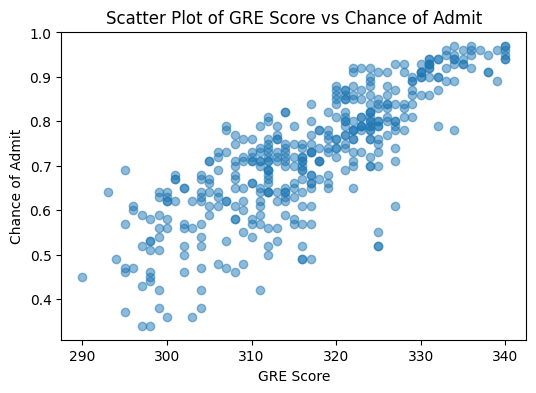

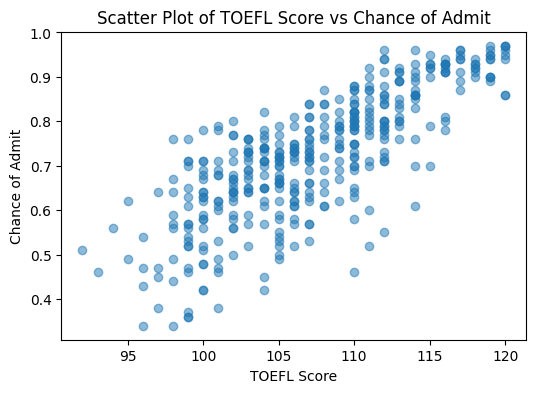

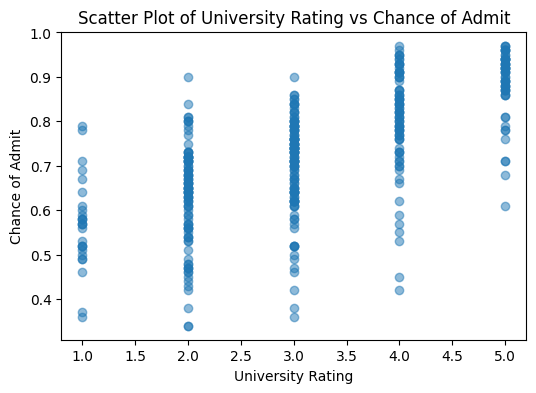

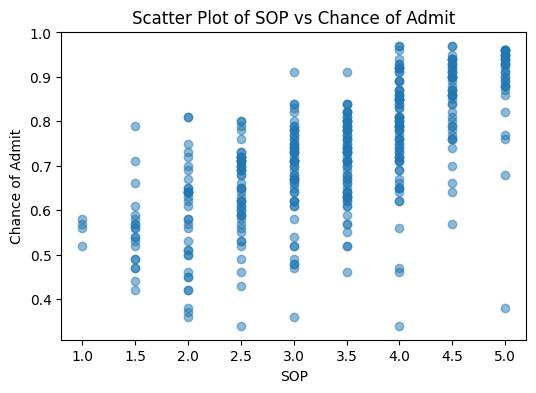

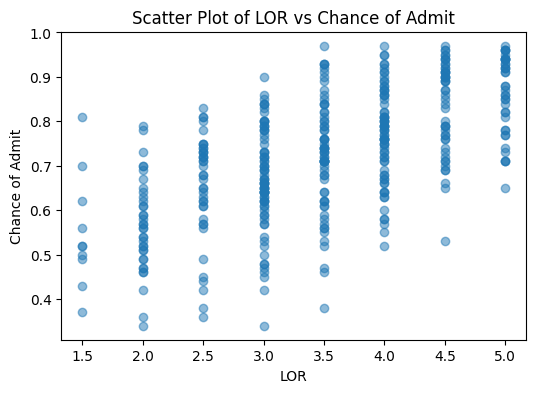

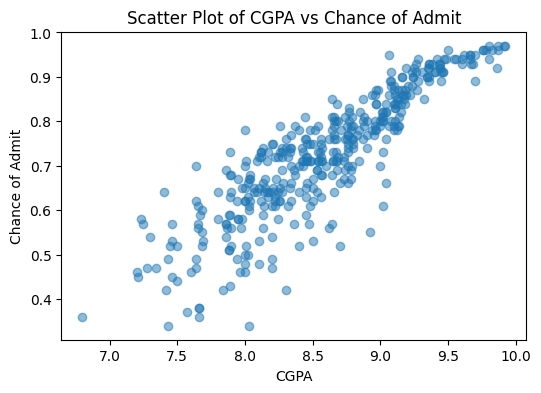

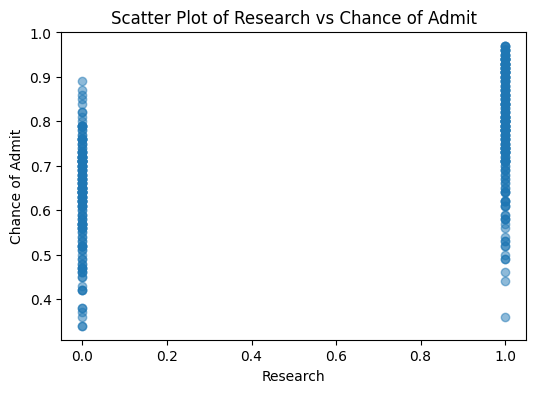

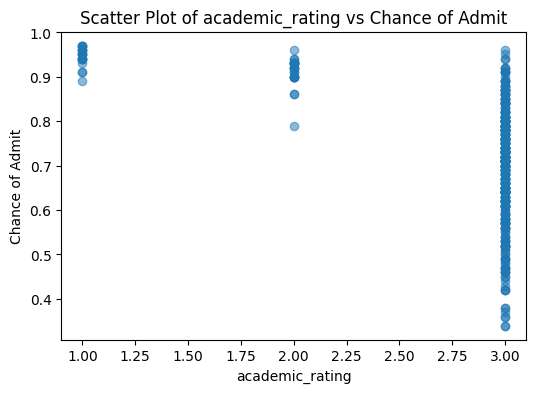

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create scatter plots for each feature
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'academic_rating']

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train[feature], y_train, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Chance of Admit')
    plt.xlabel(feature)
    plt.ylabel('Chance of Admit')
    plt.show()


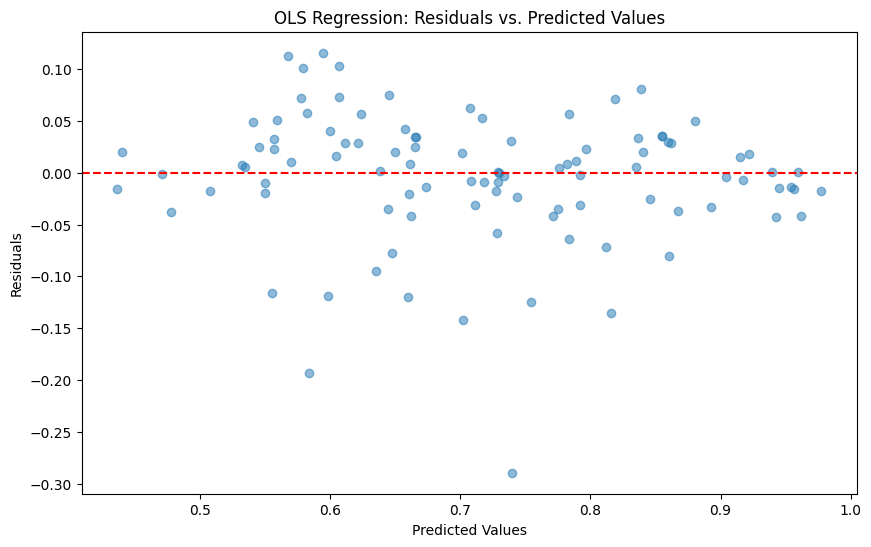

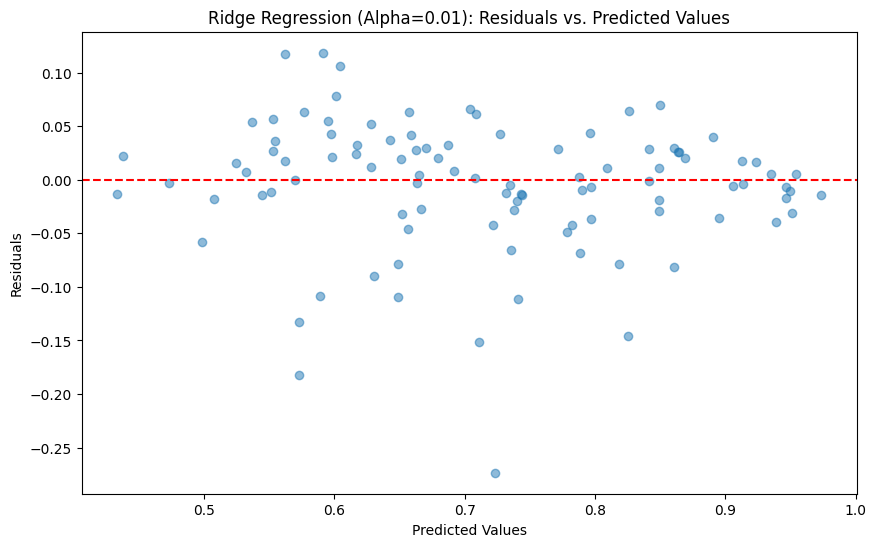

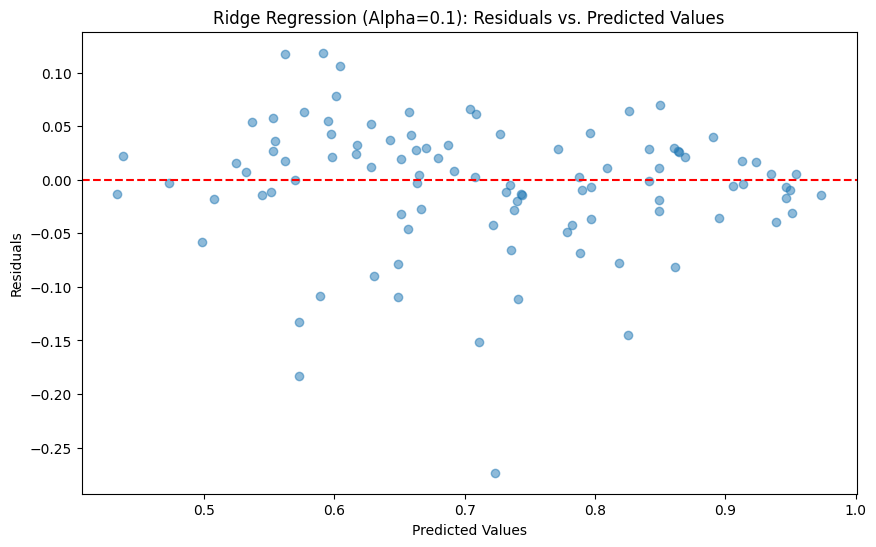

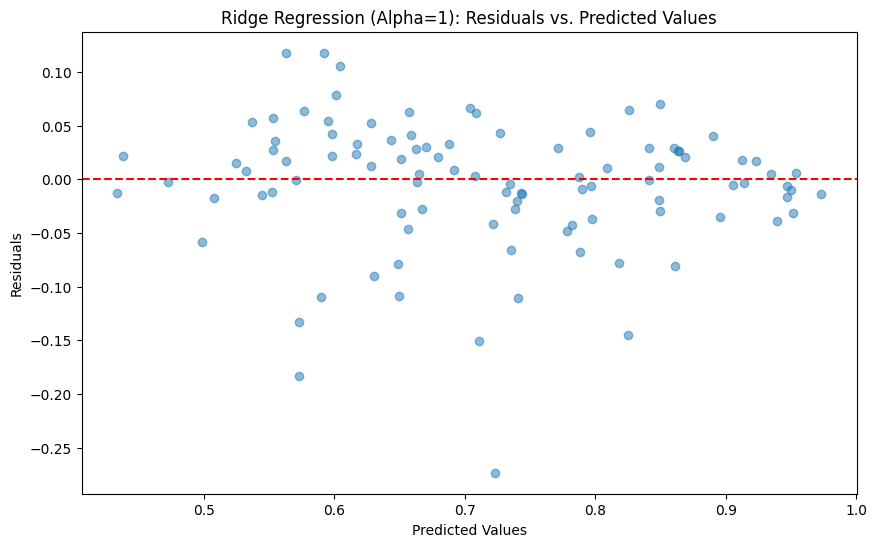

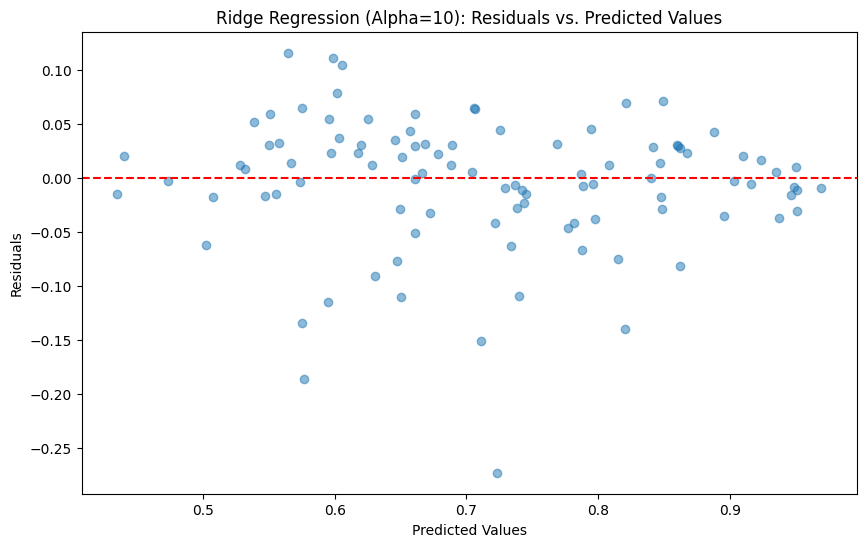

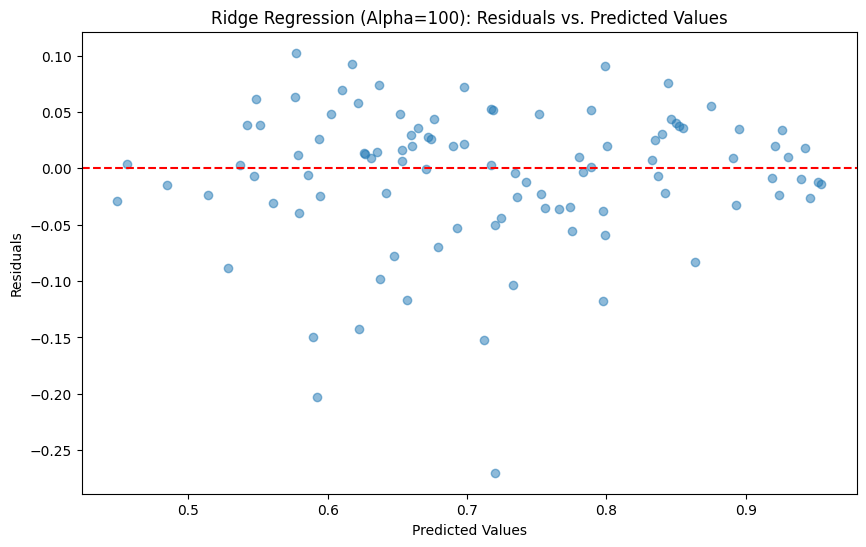

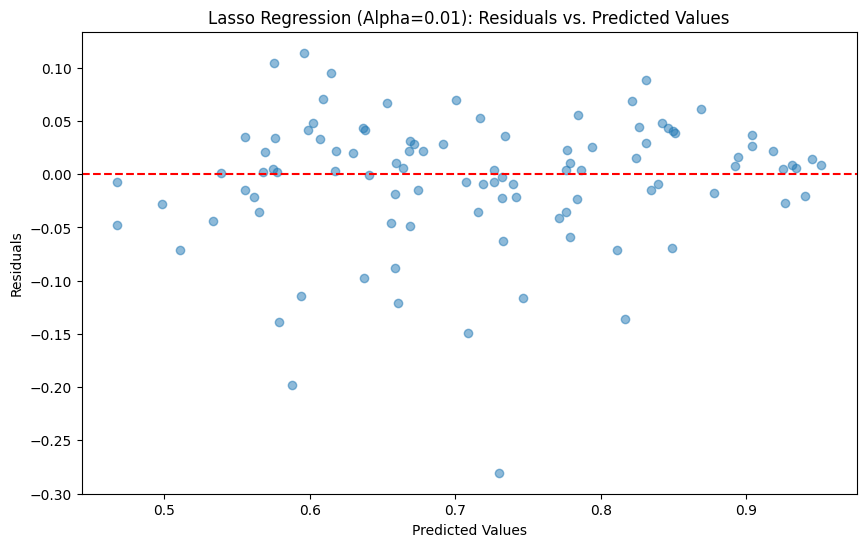

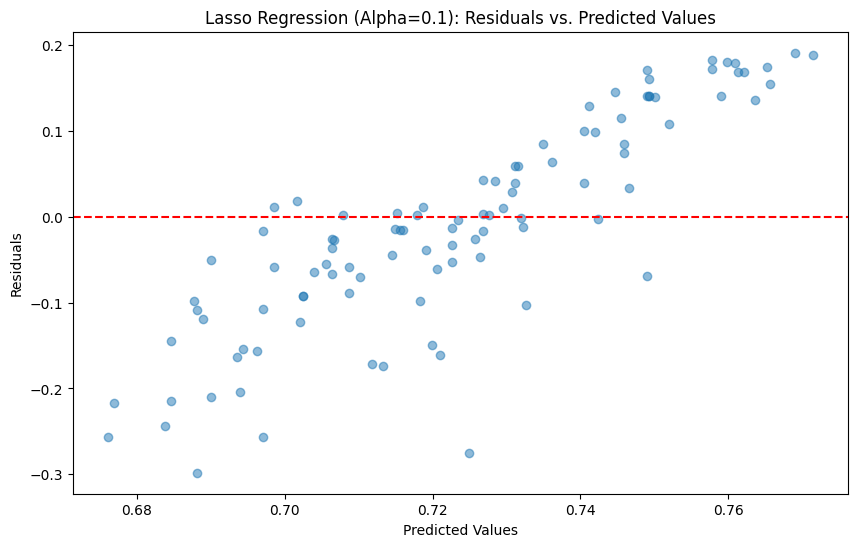

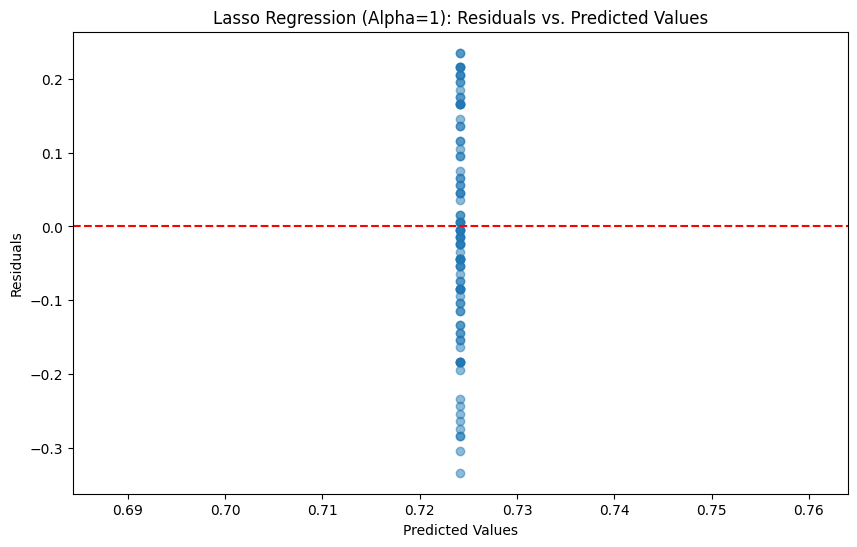

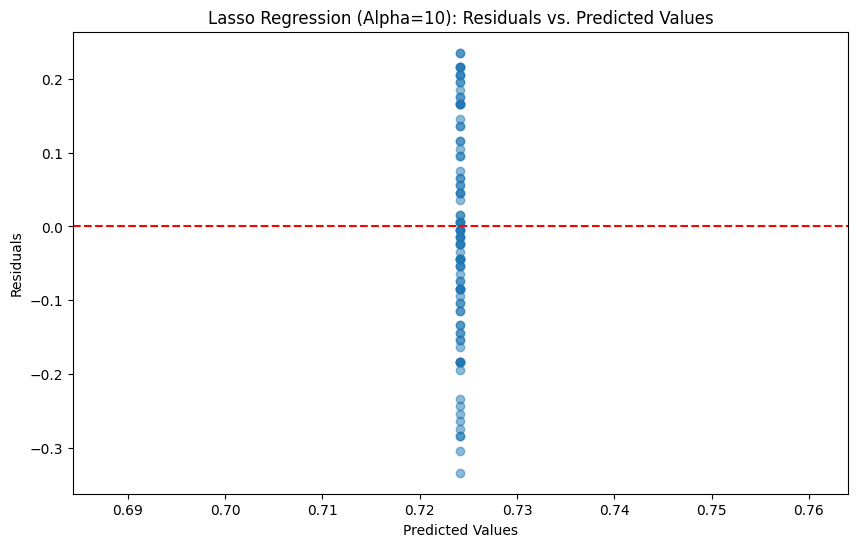

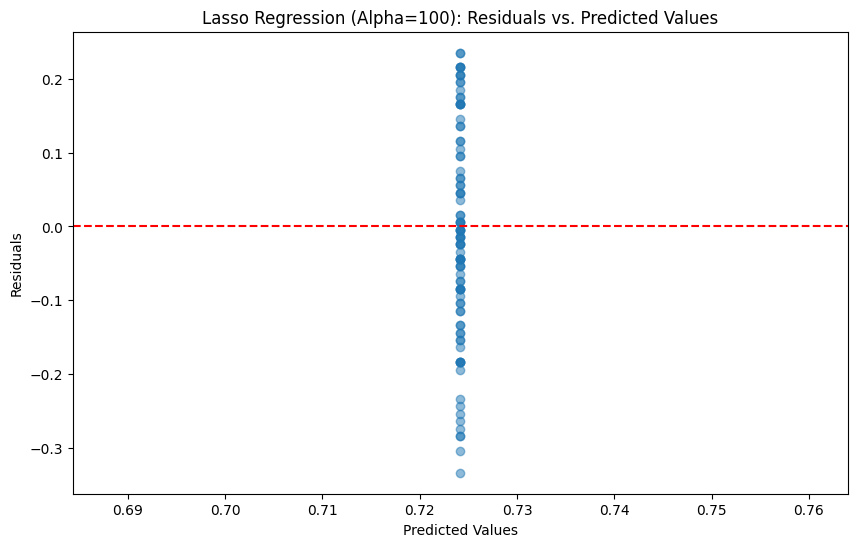

In [84]:
import matplotlib.pyplot as plt

# Function to plot residuals
def plot_residuals(y_actual, y_pred, title):
    residuals = y_actual - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

# Residuals for OLS model
y_pred_ols = model_reduced.predict(X_test_reduced)
plot_residuals(y_test, y_pred_ols, 'OLS Regression: Residuals vs. Predicted Values')

# Ridge Regression Residual Plots
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    plot_residuals(y_test, y_pred_ridge, f'Ridge Regression (Alpha={alpha}): Residuals vs. Predicted Values')

# Lasso Regression Residual Plots
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    plot_residuals(y_test, y_pred_lasso, f'Lasso Regression (Alpha={alpha}): Residuals vs. Predicted Values')


# **Linear Relationships:**

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.
If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

**Insights:**
From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

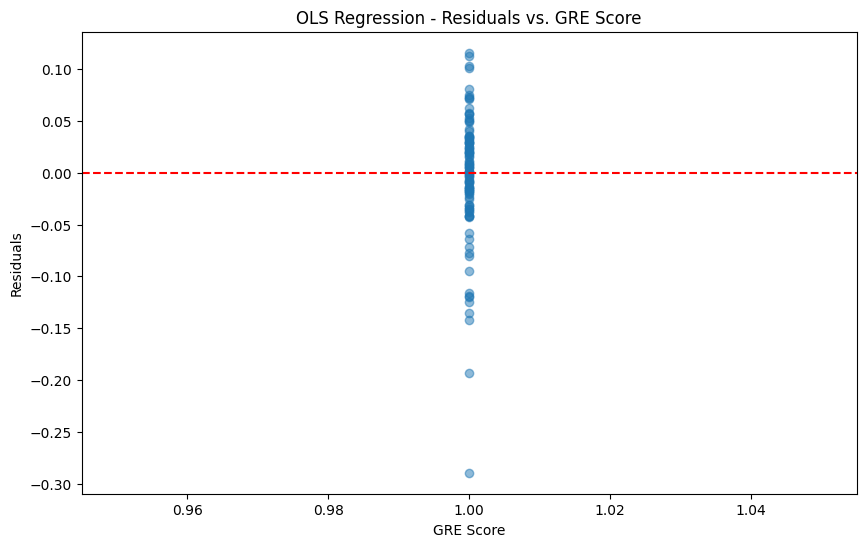

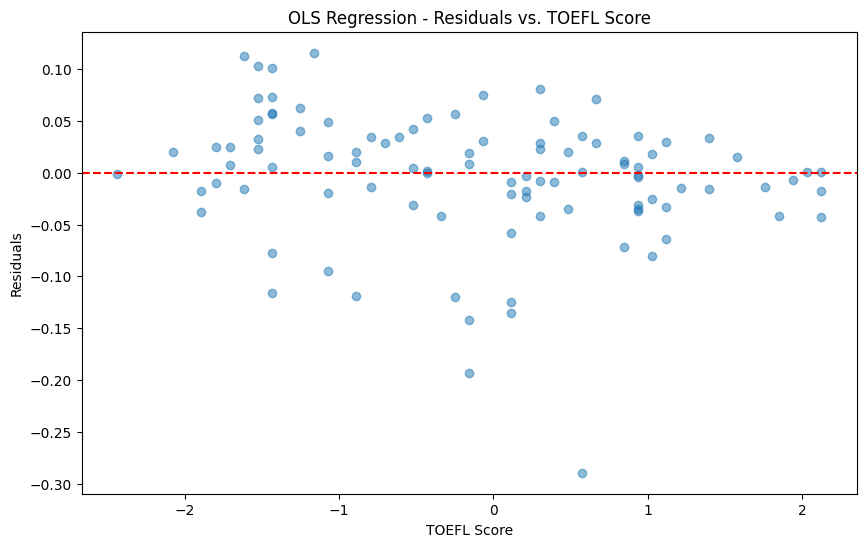

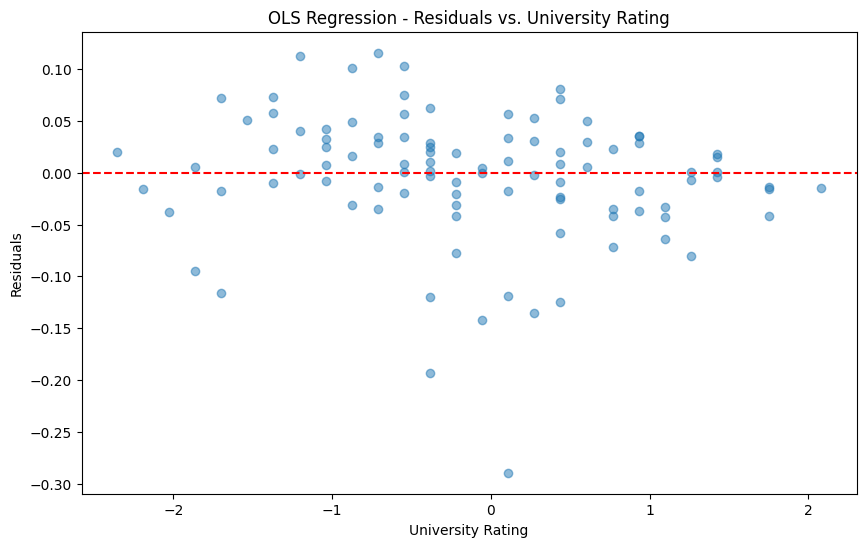

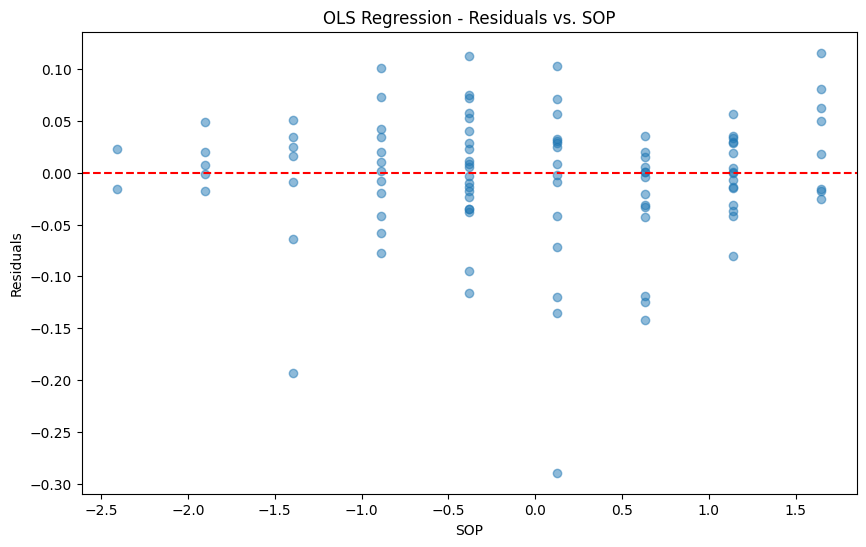

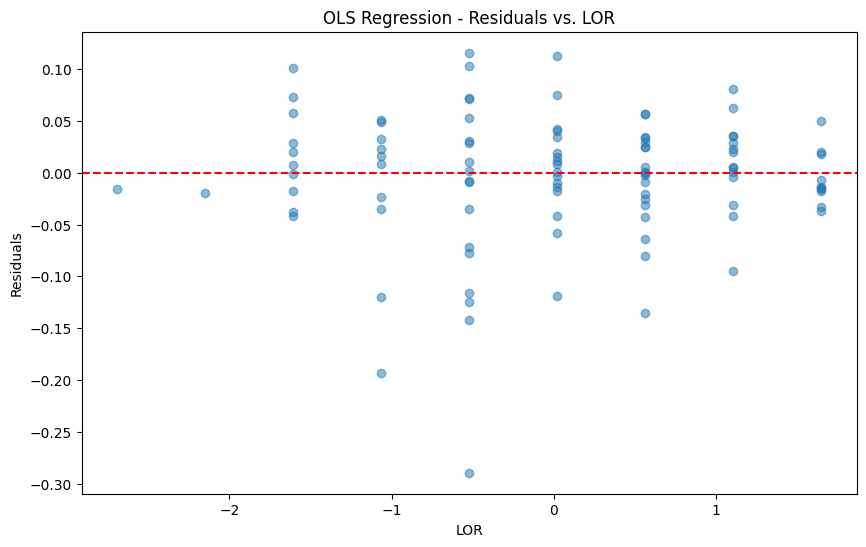

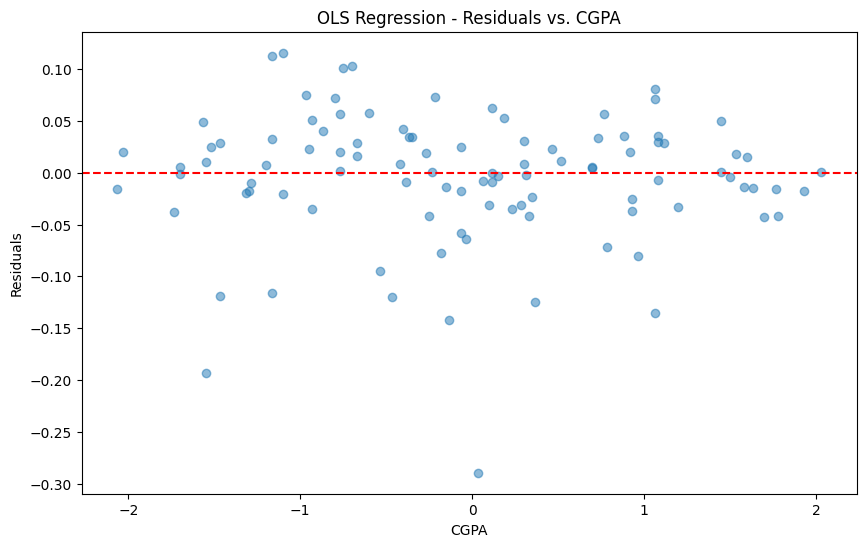

NameError: name 'best_alpha_ridge' is not defined

In [85]:
import matplotlib.pyplot as plt

# Function to plot residuals vs. each feature
def plot_residuals_vs_feature(X_features, y_actual, y_pred, feature_names, title):
    residuals = y_actual - y_pred
    for i, feature in enumerate(feature_names):
        plt.figure(figsize=(10, 6))
        plt.scatter(X_features[:, i], residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel(feature)
        plt.ylabel('Residuals')
        plt.title(f'{title} - Residuals vs. {feature}')
        plt.show()

# Get feature names (use appropriate names based on your dataset)
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Academic Rating']

# Residuals for OLS
plot_residuals_vs_feature(X_test_reduced, y_test, y_pred_ols, feature_names[:len(X_test_reduced[0])], 'OLS Regression')

# Residuals for Ridge (best alpha)
plot_residuals_vs_feature(X_test_scaled, y_test, y_pred_ridge, feature_names, f'Ridge Regression (Alpha={best_alpha_ridge})')

# Residuals for Lasso (best alpha)
plot_residuals_vs_feature(X_test_scaled, y_test, y_pred_lasso, feature_names, f'Lasso Regression (Alpha={best_alpha_lasso})')


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

# Calculate residuals and predicted values
y_pred_ols = model_reduced.predict(X_test_reduced)
residuals_ols = y_test - y_pred_ols

# Add a constant to the model matrix for the test
X_test_reduced_with_const = sm.add_constant(X_test_reduced)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals_ols, X_test_reduced_with_const)

# Extract test statistics and p-value
bp_test_statistic = bp_test[0]
bp_test_p_value = bp_test[1]

print(f"Breusch-Pagan Test Statistic: {bp_test_statistic}")
print(f"Breusch-Pagan p-value: {bp_test_p_value}")

# Check the p-value against the significance level
alpha = 0.05
if bp_test_p_value > alpha:
    print("Fail to reject the null hypothesis: Homoscedasticity is present.")
else:
    print("Reject the null hypothesis: Heteroscedasticity is present.")


**Homoscedasticity Confirmed:**

Fail to Reject the Null Hypothesis: The p-value is greater than 0.05, which means there is no strong evidence of heteroscedasticity. The residuals do not exhibit a pattern of increasing or decreasing variance with the predictor variables.

**Model Validity:**

Assumption of Constant Variance Met: Since homoscedasticity is present, the assumption of constant variance of residuals is satisfied. This supports the validity of using ordinary least squares (OLS) regression for your analysis.

**Normality of residuals**

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats



# Histogram of Residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
mu, std = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


# **Jarque-Bera Test**

**Jarque-Bera Statistic:**
A measure of the deviation from normality.

**p-value:**
If the p-value is greater than the significance level (usually 0.05), you fail to reject the null hypothesis, indicating that the residuals are normally distributed.

In [ ]:
import numpy as np
import scipy.stats as stats


# Perform the Jarque-Bera test
jb_statistic, jb_p_value = stats.jarque_bera(residuals)

# Print the results
print(f'Jarque-Bera Statistic: {jb_statistic}')
print(f'Jarque-Bera p-value: {jb_p_value}')

# Interpretation
alpha = 0.05
if jb_p_value > alpha:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")
else:
    print("Reject the null hypothesis: Residuals are not normally distributed.")


**The results of the Jarque-Bera test are:**

Jarque-Bera Statistic: 77.16

p-value: 1.76e-17

Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that the residuals are not normally distributed.

**Insights:**
Non-Normality: The residuals deviate significantly from normality, as evidenced by the high JB statistic and very low p-value.
Implications: Non-normality of residuals might suggest issues with the model's fit or the need for transformation of the dependent variable or the use of alternative modeling approaches.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to calculate the adjusted R-squared
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate metrics for OLS
mae_ols = mean_absolute_error(y_test, y_pred_ols)
rmse_ols = mean_squared_error(y_test, y_pred_ols, squared=False)
r2_ols = r2_score(y_test, y_pred_ols)
adj_r2_ols = adjusted_r2_score(y_test, y_pred_ols, X_test_reduced)

# Calculate metrics for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = adjusted_r2_score(y_test, y_pred_ridge, X_test_scaled)

# Calculate metrics for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = adjusted_r2_score(y_test, y_pred_lasso, X_test_scaled)

# Display results
print("OLS Regression Metrics:")
print(f"MAE: {mae_ols}")
print(f"RMSE: {rmse_ols}")
print(f"R²: {r2_ols}")
print(f"Adjusted R²: {adj_r2_ols}")

print("\nRidge Regression Metrics:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")
print(f"Adjusted R²: {adj_r2_ridge}")

print("\nLasso Regression Metrics:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²: {r2_lasso}")
print(f"Adjusted R²: {adj_r2_lasso}")


# **Model Performance Insights:**
**Mean Absolute Error (MAE):**

OLS: 0.0433
Ridge: 0.0425
Lasso: 0.0427
Insight: Ridge regression has the lowest MAE, indicating slightly better average prediction accuracy compared to OLS and Lasso. Lasso and OLS have similar MAE values.

**Root Mean Square Error (RMSE):**

OLS: 0.0624
Ridge: 0.0609
Lasso: 0.0617
Insight: Ridge regression also has the lowest RMSE, suggesting it performs better in terms of minimizing large errors compared to OLS and Lasso. RMSE values are fairly close for all models.

**R² Score:**

OLS: 0.8094
Ridge: 0.8185
Lasso: 0.8140
Insight: Ridge regression has the highest R² score, meaning it explains the most variance in the dependent variable among the three models. All models perform well in terms of explanatory power.

**Adjusted R²:**

OLS: 0.7971
Ridge: 0.8003
Lasso: 0.7954
Insight: Ridge regression also has the highest Adjusted R², reflecting its efficiency in accounting for the number of predictors. The difference between Ridge and the other models is modest but indicates better performance when adjusted for model complexity.

**Summary:**
Ridge Regression outperforms both OLS and Lasso in terms of MAE, RMSE, R², and Adjusted R², making it the most effective model among the three for this dataset.
OLS and Lasso models are comparable, with OLS slightly better in terms of MAE and Lasso marginally better in Adjusted R².

# **Business Insights:**

**Predictors of Admission Success:**

 The OLS regression results reveal that GRE, TOEFL, Academic Rating, and CGPA significantly impact the chances of admission. GRE (0.0336) and CGPA (0.0684) are the strongest predictors, indicating that higher scores in these areas substantially increase admission chances.

**LOR's Limited Impact:**

 Despite being a common requirement for admissions, the Letters of Recommendation (LOR) show minimal impact on the Chance of Admit (p-value = 0.460), suggesting that its role in the admissions process might be overvalued.

**Model Performance:**

 The OLS model has an R-squared value of 0.816, indicating that 81.6% of the variability in admissions chances is explained by the included variables. This strong explanatory power supports the idea that admissions decisions can largely be predicted by quantitative factors like GRE, TOEFL, and CGPA.

**Ridge vs. Lasso Regression:**

 Ridge regression, with an alpha value of 0.01 or 0.1, performs well, with a high R-squared (0.818) and low mean squared error (MSE = 0.0037). Lasso regression, however, shows performance deterioration as alpha increases, indicating underfitting. Ridge is the preferred model for this analysis.

**Regularization's Role in Predictive Models:**

 Ridge regression shows better stability than Lasso, particularly with smaller alpha values. This insight underscores that slight regularization is beneficial to avoid overfitting while maintaining predictive power.

# **Recommendations:**

**Focus on GRE and CGPA for Admission Strategies:**

 Since GRE and CGPA are the strongest predictors of admission success, universities should emphasize these criteria when designing admission strategies. For students, improving GRE and CGPA should be a priority for maximizing their admission chances.

**Reevaluate the Importance of LOR:**

 Given the limited impact of LOR on the admissions decision, universities could reconsider the weight given to recommendation letters. Instead, placing more emphasis on measurable academic achievements might better align with predictive models.

**Use Ridge Regression for Predictive Analytics:**

 For predicting future admissions outcomes, Ridge regression with a low alpha value (e.g., 0.01) is recommended. It offers a balance between model accuracy and regularization, ensuring the model remains robust without overfitting.

**Enhance Data Collection:**

 While the current model explains a significant portion of admission chances, unexplained variability (18.4%) suggests other qualitative factors could be considered, such as personal statements or extracurricular activities, to refine the predictive model.

**Monitor for Outliers and Multicollinearity:**

 Regular checks for multicollinearity and outliers should be integrated into the model validation process. Ensuring that predictor variables are not overly correlated with each other will enhance model accuracy.